<a href="https://colab.research.google.com/github/Sviatoslavzz/vkr_project_Data_analysis/blob/develop/vkr_project_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ товарного ассортимента магазина

## Описание проекта

### Аналитическая задача

Провести анализ товарного ассортимента и определить какие товары входят в основной и дополнительный ассортимент.

Дополнительный ассортимент -- товары, которые можно предлагать как сопутствующие или располагать в прикассовой зоне.

### Описание данных
|Признак | Комментарий|
|--:|:--|
|`date` | дата заказа|
|`customer_id` | идентификатор покупателя|
|`order_id` | идентификатор заказа|
|`product` | наименование товара|
|`quantity` | количество товара в заказе|
|`price` | цена товара|

Примерная последовательность выполнения работ

Шаг 1. Загрузка данных
- Загрузка данных и предварительный анализ

Шаг 2. Подготовка данных (при необходимости)
- Корректировка заголовков;
- Корректировка типов признаков;
- Поиск дублей, аномальных и пропущенных значений;
- Добавление новых столбцов.

Шаг 3. Исследовательский анализ данных
- Построить диаграмму количества покупок по дням;
- Построить диаграмму, отображающую сумму покупок по дням;
- Построить гистограмму, отображающую распределение заказов по сумме.

Шаг 4. Анализ торгового асортимента
- На основании наименования товара и данных открытых внешних источников предложить 3-10 категорий товаров;
- В каждой категории распределить товары на основной и дополнительный ассортимент.

Шаг 5. Статистические гипотезы
- Сформулировать и проверить статистические гипотезы о равенстве средних чеков для выделенных категорий товаров.

Шаг 6. Рекомендации (дополнительное задание)
- Разработать модель для рекомендаций.

In [ ]:
# импорт необходимых для проекта библиотек

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import mannwhitneyu

### Шаг 1. Загрузка данных

In [ ]:
# чтение файла "vkr_project_retail.csv" в датафрейм Pandas

df = pd.read_csv('/content/vkr_project_retail.csv')

In [ ]:
df.head(4)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [ ]:
# Предварительный анализ датасета

print(f"""Количество записей в датасете = {df.shape[0]}
Количество уникальных клиентов = {df.customer_id.nunique()}
Количество уникальных заказов = {df.order_id.nunique()}
Минимальная стоимость ед. товара = {df.price.min()} ден. ед.
Максимальная стоимость ед. товара = {df.price.max()}  ден. ед.""")

Количество записей в датасете = 6737
Количество уникальных клиентов = 2451
Количество уникальных заказов = 2784
Минимальная стоимость ед. товара = 9.0 ден. ед.
Максимальная стоимость ед. товара = 14917.0  ден. ед.


### Шаг 2. Подготовка данных

In [ ]:
# проверка заголовков признаков

df.columns

Index(['date', 'customer_id', 'order_id', 'product', 'quantity', 'price'], dtype='object')

In [ ]:
# так как есть зарезирвированная функция 'product' - заменим заголовок признака
# на 'goods'

df.rename(columns = {
    'product': 'goods'
}, inplace = True)

In [ ]:
# корректировка типов признаков

df = df.astype({
    'order_id': 'object',
})

In [ ]:
# корректировка типа данных и формата отображения признака "date"

df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d%H')

In [ ]:
# добавление столбцов
# добавление столбца - суммы за товар

df['goods_sum'] = df.quantity * df.price

In [ ]:
# добавление столбца с датой без времени

df['date_only'] = df.date.dt.date
df.date_only = df.date_only.astype('datetime64')

In [ ]:
df.tail(3)

,date,customer_id,order_id,goods,quantity,price,goods_sum,date_only
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,157.0,2019-10-31
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,397.0,2019-10-31
6736,2019-10-31 16:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,1087.0,2019-10-31


In [ ]:
# поиск пропущенных значений
# смотрим на кол-во пропусков по каждому признаку

df.isna().sum()

date           0
customer_id    0
order_id       0
goods          0
quantity       0
price          0
goods_sum      0
date_only      0
dtype: int64

In [ ]:
# поиск дубликатов в датафрейме

df.duplicated().sum()

0

In [ ]:
# поиск аномальных значений - признак "quantity"
# т.е. кол-во товаров в одном заказе по каждому товару и сколько раз встречается такое кол-во

df_quantity = df.groupby('quantity').agg(repeats = ('quantity', 'count')).reset_index().sort_values(by='quantity')
df_quantity.tail(8)

,quantity,repeats
41,100,4
42,140,1
43,150,5
44,170,1
45,200,1
46,300,1
47,334,1
48,1000,1


In [ ]:
# функция для расчета усов

def calc_boxplot(ser):
  Q1, median, Q3 = np.percentile(np.asarray(ser.dropna()), [25, 50, 75])
  IQR = Q3 - Q1
  loval = Q1 - 1.5 * IQR
  hival = Q3 +1.5 * IQR
  wiskhi = np.compress(np.asarray(ser) <= hival, np.asarray(ser))
  wisklo = np.compress(np.asarray(ser) >= loval, np.asarray(ser))
  actual_hival = np.max(wiskhi)
  actual_loval = np.min(wisklo)
  return actual_loval, actual_hival

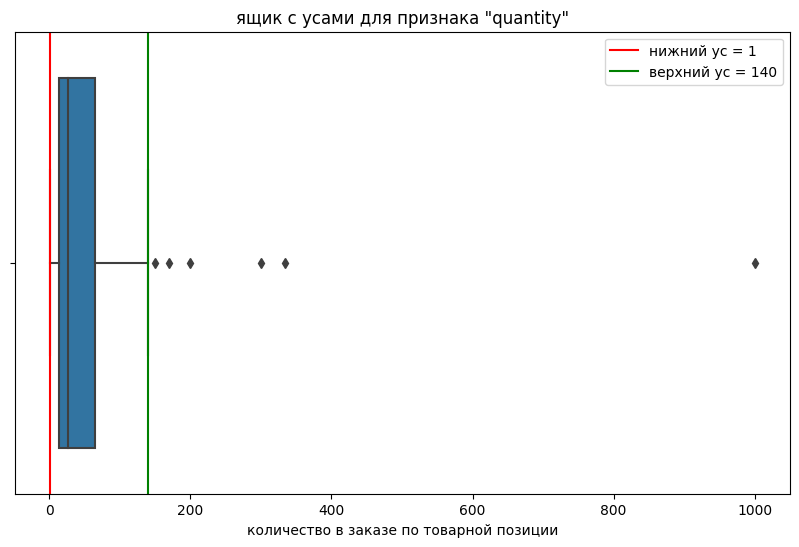

In [ ]:
# для наглядности построим ящик с усами и проверим значение усов

plt.figure(figsize = (10,6))
ax = sns.boxplot(x = df_quantity.quantity)
plt.title('ящик с усами для признака "quantity"', fontsize=12)
plt.xlabel('количество в заказе по товарной позиции')
ax.axvline(
    calc_boxplot(df_quantity.quantity)[0],
    color='red',
    label = f'нижний ус = {calc_boxplot(df_quantity.quantity)[0]}'
)
ax.axvline(
    calc_boxplot(df_quantity.quantity)[1],
    color='green',
    label = f'верхний ус = {calc_boxplot(df_quantity.quantity)[1]}'
)
plt.legend()
plt.show()

Делаем вывод: что есть несколько заказов, в которых кол-во товара аномально большое.

Так как аналитическая задача - провести анализ товарного ассортимента:

примем, что аномально большое кол-во товара для заказа > 100 шт. на 1 товар.

Так как, кол-во таких товаров 11, что несопоставимо с кол-вом записей 6737 - удалим эти значения из датафрейма

In [ ]:
# удаление аномальных значений по признаку "quantity"

index_to_del = list(df[df.quantity > 100].index)
# [211, 212, 266, 267, 568, 586, 1158, 2431, 3961, 5071, 5456]
df.drop(index = index_to_del, inplace=True)

In [ ]:
# проверим - есть ли повторяющиеся идентификаторы заказов (order_id) в разные даты
# примем, что каждый уникальный заказ имеет один уникальный идентификатор

df_orders = df.groupby('order_id').agg(days = ('date_only', 'nunique')).reset_index()
df_orders[df_orders.days > 1].sort_values(by='days')

,order_id,days
1541,70734,2
1721,71089,2
1739,71130,2
1748,71143,2
1758,71160,2
...,...,...
1749,71148,11
929,69531,11
724,69162,15
221,14833,22


Получаем 189 уникальных заказов, которые повторяются в разные даты.

Примем, что это аномалии или ошибки выгрузки данных из системы и такие повторения следует удалить.

Однако, необходимо оставить по 1-му экзмепляру таких заказов в датафрейме (на первую дату)

In [ ]:
# удаление повторяющихся id заказов в разные даты

df_orders_to_check = df_orders[df_orders.days > 1].sort_values(by='days').reset_index()

In [ ]:
# запишем все индексы повторяющихся заказов, исключая заказ сделанный впервые (по дате)
list_index_to_del = []

for order in df_orders_to_check.order_id.values:
  f_mention_date = df.date_only[df.order_id == order].iloc[0]
  list_index_to_del.extend(list(df[(df.order_id == order) & (df.date_only != f_mention_date)].index))

In [ ]:
# получаем следующее кол-во записей к удалению в датафрейме

len(list_index_to_del)

1725

In [ ]:
# удаляем повторяющиеся в разные даты заказы

df.drop(index = list_index_to_del, inplace = True)

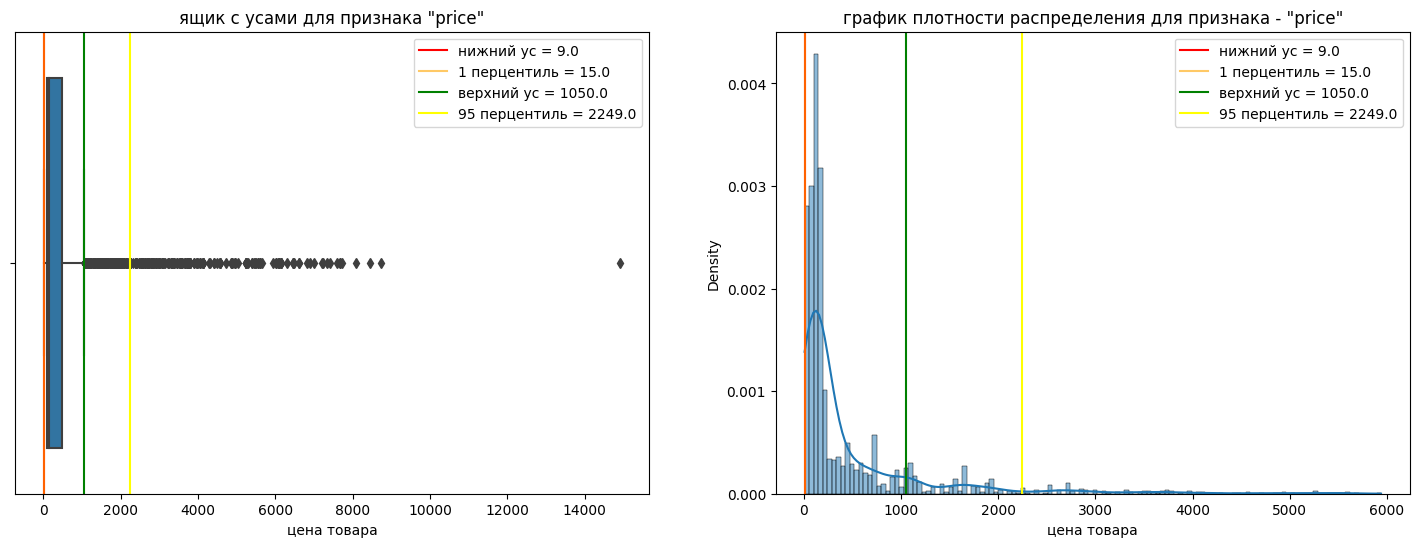

In [ ]:
# поиск аномалий по признаку "price"
# построим ящик с усами и график плотности распределения
# для наглядности обрежем график плотности чуть выше 99 перцентиля

fig2, ax2 = plt.subplots(1, 2, figsize=(18,6))
plt.subplot(1,2,1)
ax2 = sns.boxplot(x = df.price)
plt.title('ящик с усами для признака "price"', fontsize=12)
plt.xlabel('цена товара')
ax2.axvline(
    calc_boxplot(df.price)[0],
    color='red',
    label = f'нижний ус = {calc_boxplot(df.price)[0]}'
)
ax2.axvline(
    np.percentile(df.price, 1),
    color='orange',
    label = f'1 перцентиль = {np.percentile(df.price, 1)}',
    alpha = 0.6
)
ax2.axvline(
    calc_boxplot(df.price)[1],
    color='green',
    label = f'верхний ус = {calc_boxplot(df.price)[1]}'
)
ax2.axvline(
    np.percentile(df.price, 95),
    color='yellow',
    label = f'95 перцентиль = {np.percentile(df.price, 95)}'
)
plt.legend();

plt.subplot(1,2,2)
ax2 = sns.histplot(x = 'price',data = df[df.price < 6000], kde=True, stat='density')
plt.title('график плотности распределения для признака - "price"', fontsize=12)
ax2.axvline(
    calc_boxplot(df.price)[0],
    color='red',
    label = f'нижний ус = {calc_boxplot(df.price)[0]}'
)
ax2.axvline(
    np.percentile(df.price, 1),
    color='orange',
    label = f'1 перцентиль = {np.percentile(df.price, 1)}',
    alpha = 0.6
)
ax2.axvline(
    calc_boxplot(df.price)[1],
    color='green',
    label = f'верхний ус = {calc_boxplot(df.price)[1]}'
)
ax2.axvline(
    np.percentile(df.price, 95),
    color='yellow',
    label = f'95 перцентиль = {np.percentile(df.price, 95)}'
)
plt.xlabel('цена товара')
plt.legend();

In [ ]:
# посчитаем кол-во значений выше верхнего уса и выше 95 перцентиля

print(f"""кол-во значений выше верхего уса: {df[df.price > 1050.0].shape[0]}
кол-во значений выше 95 перцентиля {df[df.price > 2249.0].shape[0]}""")

кол-во значений выше верхего уса: 674
кол-во значений выше 95 перцентиля 239


Стоит обратить внимание на то, что есть отдельные категории товаров, цены на которые выше значения верхнего уса, а также выше значения 95 перцентиля. (пример в ячейке ниже)

Однако, для данного исследования примем эти товарные позиции несущественными для анализа, обрежем аномалии по признаку "price" по значению 95 перцентиля.

In [ ]:
df[df.goods.str.contains('Урна ул', case=False)]

,date,customer_id,order_id,goods,quantity,price,goods_sum,date_only
661,2018-11-06 12:00:00,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см...",5,4874.0,24370.0,2018-11-06
6169,2019-08-23 12:00:00,8d85f320-5f55-4647-814c-da1a6b21c2a4,72381,Урна уличная стальная Сальвадор 02.021.0 46х11...,1,7349.0,7349.0,2019-08-23
6686,2019-10-23 15:00:00,6cfdad48-10fd-443b-bc67-93078c646779,73077,Урна уличная стальная Юпитер 02.012.0 38х38х60 см,1,6899.0,6899.0,2019-10-23


In [ ]:
# удаление аномальных значений по признаку "price" по 95 перцентилю

df.drop(index=list(df[df.price > 2249.0].index), inplace = True)

### Шаг 3. Исследовательский анализ данных

In [ ]:
# период времени, за который имеются данные

print(f"""Начальная дата в выборке: {df.date_only.min().date()}
Конечная дата в выборке {df.date_only.max().date()}
Период накопления данных {df.date_only.max() - df.date_only.min()}""")

Начальная дата в выборке: 2018-10-01
Конечная дата в выборке 2019-10-31
Период накопления данных 395 days 00:00:00


In [ ]:
# количество уникальных заказов по дням

df_orders_by_day = df.groupby('date_only').agg(u_orders_count = ('order_id', 'nunique')).reset_index()
df_orders_by_day.head(8)

,date_only,u_orders_count
0,2018-10-01,10
1,2018-10-02,12
2,2018-10-03,7
3,2018-10-04,10
4,2018-10-05,7
5,2018-10-06,2
6,2018-10-07,6
7,2018-10-08,14


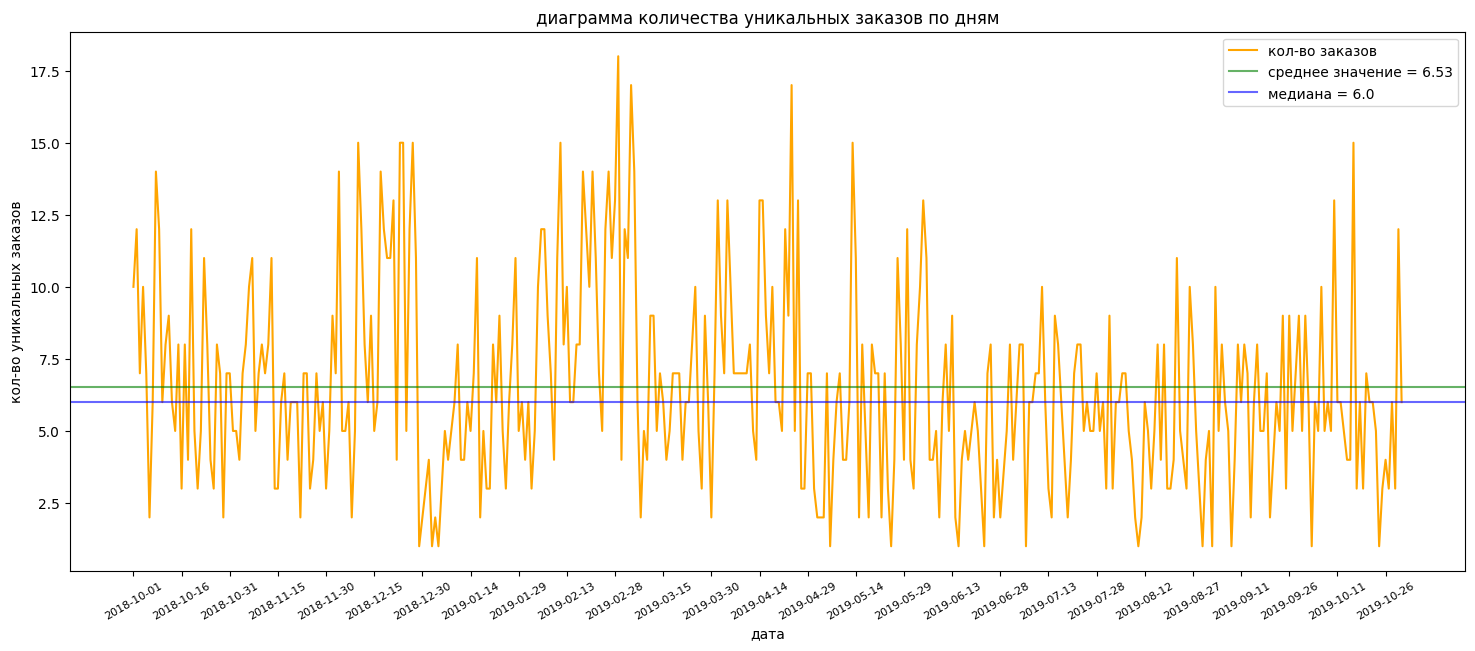

In [ ]:
# диаграмма количества уникальных заказов по дням

plt.figure(figsize = (18,7))

ax3 = sns.lineplot(data = df_orders_by_day,
                   x='date_only',
                   y='u_orders_count',
                   label = 'кол-во заказов',
                   color = 'orange'
                  )
plt.xlabel('дата')
plt.ylabel('кол-во уникальных заказов')
plt.title('диаграмма количества уникальных заказов по дням');
plt.xticks(np.arange(df_orders_by_day.date_only.min(), df_orders_by_day.date_only.max(), pd.to_timedelta('15 day')), fontsize=8, rotation=30);
ax3.axhline(
    df_orders_by_day.u_orders_count.mean(),
    color='green',
    label = f'среднее значение = {df_orders_by_day.u_orders_count.mean().round(2)}',
    alpha=0.6
)
ax3.axhline(
    df_orders_by_day.u_orders_count.median(),
    color='blue',
    label = f'медиана = {df_orders_by_day.u_orders_count.median().round(2)}',
    alpha=0.6
)
plt.legend();

In [ ]:
# сумма покупок по дням

df_sum_by_day = df.groupby('date_only').agg(total_sum = ('goods_sum', 'sum')).reset_index()
df_sum_by_day.head(8)

,date_only,total_sum
0,2018-10-01,10635.0
1,2018-10-02,10298.0
2,2018-10-03,7275.0
3,2018-10-04,17821.0
4,2018-10-05,4720.0
5,2018-10-06,2659.0
6,2018-10-07,9377.0
7,2018-10-08,23069.0


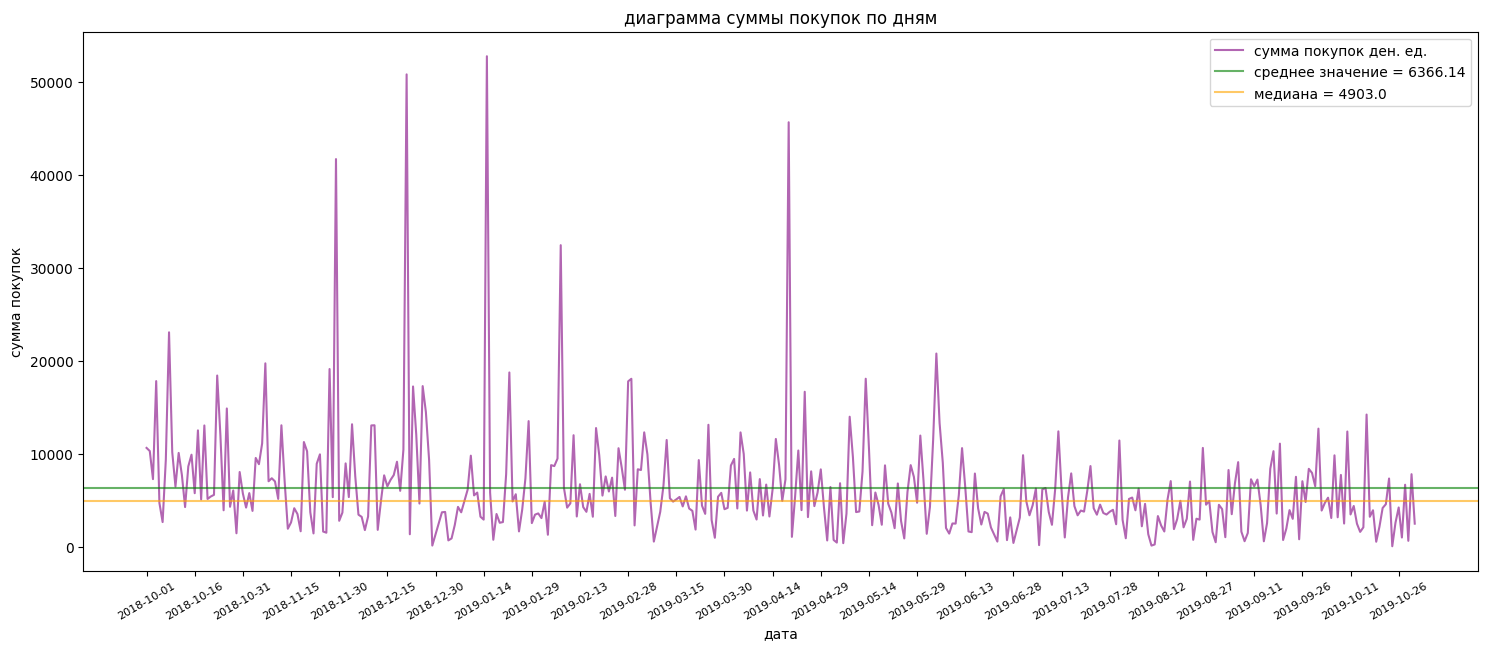

In [ ]:
# диаграмма, отображающая сумму покупок по дням

plt.figure(figsize = (18,7))

ax4 = sns.lineplot(data = df_sum_by_day,
                   x='date_only',
                   y='total_sum',
                   label = 'сумма покупок ден. ед.',
                   color = 'purple',
                   alpha=0.6
                  )
plt.xlabel('дата')
plt.ylabel('сумма покупок')
plt.title('диаграмма суммы покупок по дням');
plt.xticks(np.arange(df_sum_by_day.date_only.min(), df_sum_by_day.date_only.max(), pd.to_timedelta('15 day')), fontsize=8, rotation=30);
ax4.axhline(
    df_sum_by_day.total_sum.mean(),
    color='green',
    label = f'среднее значение = {df_sum_by_day.total_sum.mean().round(2)}',
    alpha=0.6
)
ax4.axhline(
    df_sum_by_day.total_sum.median(),
    color='orange',
    label = f'медиана = {df_sum_by_day.total_sum.median().round(2)}',
    alpha=0.6
)
plt.legend();

In [ ]:
# распределение заказов по сумме

df_orders_by_sum = df.groupby('order_id').agg(order_sum = ('goods_sum', 'sum')).reset_index()
df_orders_by_sum.head(8)

,order_id,order_sum
0,12624,375.0
1,13547,684.0
2,14480,359.0
3,14481,600.0
4,14482,376.0
5,14485,676.0
6,14486,1880.0
7,14487,514.0


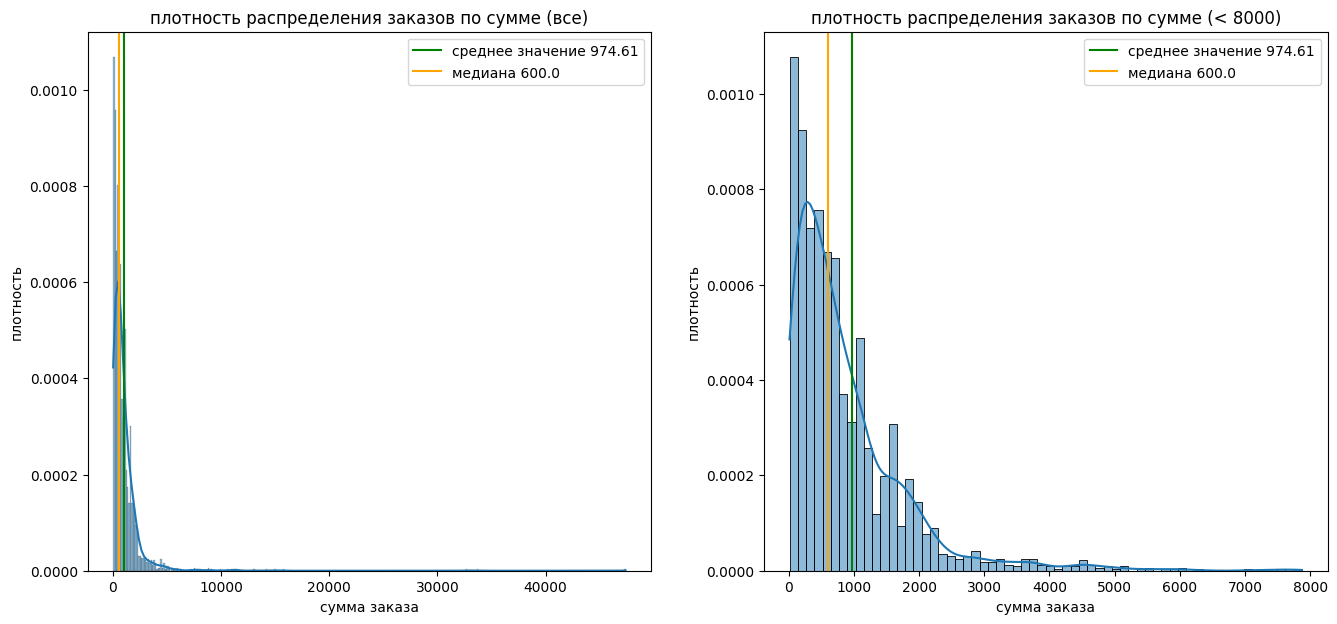

In [ ]:
# гистограмма, отображающая распределение заказов по сумме

fig5, ax5 = plt.subplots(1, 2, figsize = (16,7))
plt.subplot(1, 2, 1)
ax5 = sns.histplot(data = df_orders_by_sum,
                   x = 'order_sum',
                   kde = True,
                   stat='density')
plt.title('плотность распределения заказов по сумме (все)')
plt.xlabel('сумма заказа')
plt.ylabel('плотность')
ax5.axvline(
    df_orders_by_sum.order_sum.mean(),
    color = 'green',
    label = f'среднее значение {df_orders_by_sum.order_sum.mean().round(2)}',
)
ax5.axvline(
    df_orders_by_sum.order_sum.median(),
    color = 'orange',
    label = f'медиана {df_orders_by_sum.order_sum.median().round(2)}'
)
plt.legend();

plt.subplot(1, 2, 2)
ax5 = sns.histplot(data = df_orders_by_sum[df_orders_by_sum.order_sum < 8000],
                   x = 'order_sum',
                   kde = True,
                   stat='density')
plt.title('плотность распределения заказов по сумме (< 8000)')
plt.xlabel('сумма заказа')
plt.ylabel('плотность')
ax5.axvline(
    df_orders_by_sum.order_sum.mean(),
    color = 'green',
    label = f'среднее значение {df_orders_by_sum.order_sum.mean().round(2)}'
)
ax5.axvline(
    df_orders_by_sum.order_sum.median(),
    color = 'orange',
    label = f'медиана {df_orders_by_sum.order_sum.median().round(2)}'
)
plt.legend();


### Шаг 4. Анализ торгового асортимента

In [ ]:
# распределение товаров по категориям
# категории выбраны в соответсвии с асортиментом товаров в датасете, на основе данных из открытых источников
# и самостоятельного анализа наименований

# создаем пустую колонку для категории товаров
df['goods_category'] = ""

In [ ]:
# выключим предупреждения Pandas о присваивании значений

pd.options.mode.chained_assignment = None

In [ ]:
# создаем условия проверки вхождения в наименование товара и распределяем по категориям

# категория - "растения"
df.goods_category.loc[df.goods.str.contains('растение', case=False) |\
                  df.goods.str.contains('Герань', case=False) |\
                  df.goods.str.contains('Пеларгония', case=False) |\
                  df.goods.str.contains('Рассада', case=False) |\
                  df.goods.str.contains('h-', case=False) |\
                  df.goods.str.contains('d-', case=False) |\
                  (df.goods.str.contains(' г ', case=False) &\
                  df.goods.str.contains(' 46', case=False)) |\
                  df.goods.str.contains('Фуксия', case=False) |\
                  df.goods.str.contains('Кориандр', case=False) |\
                  df.goods.str.contains('Бегония', case=False) |\
                  df.goods.str.contains('Хризантема', case=False) |\
                  df.goods.str.contains('Флокс', case=False) |\
                  df.goods.str.contains('Роза', case=False) |\
                  df.goods.str.contains('Колокольчик', case=False) |\
                  df.goods.str.contains('Гипсофила', case=False) |\
                  df.goods.str.contains('Примула', case=False) |\
                  df.goods.str.contains('диам. 12 см', case=False) |\
                  df.goods.str.contains('D1', case=True) |\
                  df.goods.str.contains('Петуния', case=False) |\
                  df.goods.str.contains('томата', case=False) |\
                  df.goods.str.contains('огурец', case=False) |\
                  df.goods.str.contains('Сельдерей', case=False) |\
                  df.goods.str.contains('Петрушка', case=False) |\
                  df.goods.str.contains('Капуста', case=False) |\
                  df.goods.str.contains('Базилик', case=False) |\
                  df.goods.str.contains('цветковая', case=False)] = 'растения';

In [ ]:
# категория - "декор"

df.goods_category.loc[df.goods.str.contains('Муляж', case=False) |\
                  df.goods.str.contains('искус', case=False) |\
                  df.goods.str.contains('коврик', case=False) |\
                  df.goods.str.contains('ковер', case=False) |\
                  df.goods.str.contains('ковёр', case=False)] = 'декор';

In [ ]:
# категория - "кухонные принадлежности"

df.goods_category.loc[df.goods.str.contains('вилка', case=False) | \
                df.goods.str.contains('ложка', case=False) | \
                df.goods.str.contains('нож', case=False) | \
                df.goods.str.contains('тарелка', case=False) | \
                df.goods.str.contains('пищевой', case=False) | \
                df.goods.str.contains('круж', case=False) |\
                df.goods.str.contains('фужер', case=False) |\
                df.goods.str.contains('сковород', case=False) |\
                df.goods.str.contains('Мусор', case=False) |\
                df.goods.str.contains('кувшин', case=False) |\
                df.goods.str.contains('Скатерть', case=False) |\
                df.goods.str.contains('Чайник', case=False) |\
                df.goods.str.contains('Банка', case=False) |\
                df.goods.str.contains('Противень', case=False) |\
                df.goods.str.contains('посуд', case=False) |\
                df.goods.str.contains('Толкушка', case=False) |\
                df.goods.str.contains('Полотен', case=False) |\
                df.goods.str.contains('Салфет', case=False) |\
                df.goods.str.contains('Миксер', case=False) |\
                df.goods.str.contains('Овощечистка', case=False) |\
                df.goods.str.contains('Рыбочистка', case=False) |\
                df.goods.str.contains('стакан', case=False) |\
                df.goods.str.contains('элект', case=False) |\
                df.goods.str.contains('Контейнер', case=False) |\
                df.goods.str.contains('лопатк', case=False) |\
                df.goods.str.contains('терка', case=False) |\
                df.goods.str.contains('Салатник', case=False) |\
                df.goods.str.contains('Просеиватель', case=False) |\
                df.goods.str.contains('Масленка', case=False) |\
                df.goods.str.contains('Кист', case=False) |\
                df.goods.str.contains('бокал', case=False) |\
                df.goods.str.contains('кондит', case=False)|\
                df.goods.str.contains('чайный', case=False) |\
                df.goods.str.contains('варка', case=False) |\
                df.goods.str.contains('столов', case=False) |\
                df.goods.str.contains('кастр', case=False) |\
                df.goods.str.contains('сахарница', case=False) |\
                df.goods.str.contains('блюд', case=False) |\
                df.goods.str.contains('термос', case=False) |\
                df.goods.str.contains('Разделочная доска', case=False) |\
                df.goods.str.contains('Доска разделочная', case=False) |\
                df.goods.str.contains('миска', case=False) |\
                df.goods.str.contains('Хлебница', case=False) |\
                df.goods.str.contains('Половник', case=False)]  = 'кухонные принадлежности';

In [ ]:
# категория - "бытовые принадлежности для белья"

df.goods_category.loc[df.goods.str.contains('стиральной доской', case=False) |\
                  df.goods.str.contains('корзина', case=False) |\
                  df.goods.str.contains('прищеп', case=False) |\
                  df.goods.str.contains('глад', case=False) |\
                  df.goods.str.contains('Подкладка под чехол', case=False) |\
                  df.goods.str.contains('Чехол Eurogold ', case=False) |\
                  df.goods.str.contains('Гладильная доска', case=False) |\
                  df.goods.str.contains('Сушилка', case=False) |\
                  df.goods.str.contains('белья', case=False) |\
                  df.goods.str.contains('Подрукавник', case=False) |\
                  df.goods.str.contains('Утюг', case=False) |\
                  df.goods.str.contains('стирк', case=False)] = 'бытовые принадлежности для белья';

In [ ]:
# категория - "гардеробные и постельные принадлежности"

df.goods_category.loc[df.goods.str.contains('вешал', case=False) |\
                  df.goods.str.contains('Крючок одежный', case=False) |\
                  df.goods.str.contains('Чехол для одежды', case=False) |\
                  df.goods.str.contains('Чехол для платья', case=False) |\
                  df.goods.str.contains('Чехол для костюма', case=False) |\
                  df.goods.str.contains('Чехол для короткой одежды', case=False) |\
                  df.goods.str.contains('Плечики', case=False) |\
                  df.goods.str.contains('Кофр', case=False) |\
                  df.goods.str.contains('коробка', case=False) |\
                  df.goods.str.contains('Ролик для чистки', case=False) |\
                  df.goods.str.contains('вещ', case=False) |\
                  df.goods.str.contains('Одеяло', case=False) |\
                  df.goods.str.contains('Наматрицник', case=False) |\
                  df.goods.str.contains('Плед', case=False) |\
                  df.goods.str.contains('Простыня', case=False) |\
                  df.goods.str.contains('Подушка', case=False) |\
                  df.goods.str.contains('простынь', case=False) |\
                  df.goods.str.contains('постель', case=False) |\
                  df.goods.str.contains('покрывало', case=False) |\
                  df.goods.str.contains('Пододеяльник', case=False)] = 'гардеробные и постельные принадлежности';

In [ ]:
# категория - "товары для сан-узла"

df.goods_category.loc[df.goods.str.contains('Ёрш унитазный', case=False) |\
                  df.goods.str.contains('Ерш для унитаза', case=False) |\
                  df.goods.str.contains('Сиденье', case=False) |\
                  df.goods.str.contains('Дозатор', case=False) |\
                  df.goods.str.contains('Штора для ванной', case=False) |\
                  df.goods.str.contains('Штора текстильная для ванны и душа', case=False) |\
                  df.goods.str.contains('Таз', case=False) |\
                  df.goods.str.contains('ванн', case=False) |\
                  df.goods.str.contains('туалет', case=False) |\
                  df.goods.str.contains('мыло ', case=False) |\
                  df.goods.str.contains('Зубная паста', case=False) |\
                  df.goods.str.contains('паста зубная', case=False) |\
                  df.goods.str.contains('Вантуз', case=False)] = 'товары для сан-узла'

In [ ]:
# категория - "товары для уборки"

df.goods_category.loc[df.goods.str.contains('щетка', case=False) |\
                  df.goods.str.contains('щётка', case=False) |\
                  df.goods.str.contains('ёрш', case=False) |\
                  df.goods.str.contains('Перчатки', case=False) |\
                  df.goods.str.contains('Пылесос', case=False) |\
                  df.goods.str.contains('Чистящий крем', case=False) |\
                  df.goods.str.contains('Швабра', case=False) |\
                  df.goods.str.contains('ткань', case=False) |\
                  df.goods.str.contains('Веник', case=False) |\
                  df.goods.str.contains('шваб', case=False) |\
                  df.goods.str.contains('мыть', case=False)|\
                  df.goods.str.contains('губка', case=False)|\
                  df.goods.str.contains('средство', case=False) |\
                  df.goods.str.contains('Антижир', case=False) |\
                  df.goods.str.contains('тряпк', case=False)] = 'товары для уборки';

In [ ]:
# категория - "строительные товары"

df.goods_category.loc[df.goods.str.contains('строит', case=False) |\
                  df.goods.str.contains('Лестница', case=False) |\
                  df.goods.str.contains('Стяжка', case=False) |\
                  df.goods.str.contains('свер', case=False) |\
                  df.goods.str.contains('сварка', case=False) |\
                  df.goods.str.contains('петля', case=False) |\
                  df.goods.str.contains('Паста для полировки', case=False) |\
                  df.goods.str.contains('Стремянка', case=False) |\
                  df.goods.str.contains('сумка-тележка', case=False) | \
                  df.goods.str.contains('сумка', case=False) |\
                  df.goods.str.contains('Тележка', case=False) |\
                  df.goods.str.contains('Шнур', case=False) |\
                  df.goods.str.contains('шило', case=False) |\
                  df.goods.str.contains('Шпингалет', case=False) |\
                  df.goods.str.contains('инстр', case=False) |\
                  df.goods.str.contains('ковш', case=False)|\
                  df.goods.str.contains('Крючок проволочный', case=False)] = 'строительные товары';

In [ ]:
# категория - "мебель"

df.goods_category.loc[df.goods.str.contains('штор', case=False) |\
                  df.goods.str.contains('Полк', case=False) |\
                  df.goods.str.contains('Ящик', case=False) |\
                  df.goods.str.contains('Короб стеллажный', case=False) |\
                  df.goods.str.contains('комод', case=False) |\
                  df.goods.str.contains('обув', case=False)] = 'мебель';

In [ ]:
# оставшиеся единичные товары отнесем к категории - "другое"

df.goods_category.loc[df.goods_category == ''] = 'другое'

In [ ]:
# проверка пропусков по признаку - категория товара ("goods_category")

df.goods_category.isna().sum()

0

In [ ]:
# кол-во товаров в каждой категории

df.groupby('goods_category').agg(goods_in_category = ('goods_category', 'count')).reset_index().sort_values(by='goods_in_category', ascending = False)

,goods_category,goods_in_category
6,растения,2341
0,бытовые принадлежности для белья,479
2,декор,383
4,кухонные принадлежности,382
7,строительные товары,328
3,другое,321
8,товары для сан-узла,182
1,гардеробные и постельные принадлежности,124
5,мебель,119
9,товары для уборки,103


In [ ]:
# кол-во заказов в каждой категории

df.groupby('goods_category').agg(orders_count = ('order_id', 'nunique')).\
reset_index().sort_values(by='orders_count', ascending=False)

,goods_category,orders_count
6,растения,734
0,бытовые принадлежности для белья,449
4,кухонные принадлежности,304
7,строительные товары,304
2,декор,281
8,товары для сан-узла,158
3,другое,151
5,мебель,110
1,гардеробные и постельные принадлежности,102
9,товары для уборки,83


In [ ]:
# средняя, минимальная и максимальная стоимость товара в каждой категории

df.groupby('goods_category').agg(avg_price = ('price', 'mean'),
                                 min_price = ('price', 'min'),
                                 max_price = ('price', 'max')).reset_index().\
round(2).sort_values(by='avg_price', ascending=False)

,goods_category,avg_price,min_price,max_price
5,мебель,1026.84,22.0,2249.0
7,строительные товары,942.84,15.0,2025.0
0,бытовые принадлежности для белья,781.58,59.0,2249.0
1,гардеробные и постельные принадлежности,496.02,21.0,2024.0
8,товары для сан-узла,458.32,19.0,2099.0
4,кухонные принадлежности,418.66,19.0,2249.0
9,товары для уборки,369.43,22.0,2249.0
2,декор,222.12,9.0,2009.0
3,другое,210.82,11.0,2234.0
6,растения,147.48,9.0,1762.0


In [ ]:
# среднее по сумме покупок по каждой категории (отдельно по товару)

df.groupby('goods_category').agg(avg_sum = ('goods_sum', 'mean')).reset_index().\
round(2).sort_values(by='avg_sum', ascending=False)

,goods_category,avg_sum
1,гардеробные и постельные принадлежности,1693.06
5,мебель,1196.71
7,строительные товары,1113.86
9,товары для уборки,945.30
4,кухонные принадлежности,918.73
0,бытовые принадлежности для белья,861.55
8,товары для сан-узла,686.01
2,декор,497.60
3,другое,364.01
6,растения,204.26


In [ ]:
# среднее, минимально и максимальное значение чека по уникальным заказам для каждой категории

df_avg_bill = pd.DataFrame.from_dict({
    'goods_category': df.goods_category.unique(),
    'avg_bill_sum': '',
    'min_bill_sum': '',
    'max_bill_sum': ''
})

dict_df_avg_bill = {}

for cat in df.goods_category.unique():
  avg_bill_temp = df[df.goods_category == cat].groupby('order_id').\
  agg(avg_bill = ('goods_sum', 'sum')).reset_index()

  df_avg_bill.avg_bill_sum.loc[df_avg_bill.goods_category == cat] = \
  round(avg_bill_temp.avg_bill.sum() / avg_bill_temp.shape[0], 2)

  df_avg_bill.min_bill_sum.loc[df_avg_bill.goods_category == cat] = \
  avg_bill_temp.avg_bill.min()

  df_avg_bill.max_bill_sum.loc[df_avg_bill.goods_category == cat] = \
  avg_bill_temp.avg_bill.max()

  # создадим словарь из дф по средним чекам для дальнейшего анализа
  dict_df_avg_bill[cat] = avg_bill_temp

  # удалим временный дф
  del avg_bill_temp

df_avg_bill.sort_values(by='avg_bill_sum', ascending = False)

,goods_category,avg_bill_sum,min_bill_sum,max_bill_sum
3,гардеробные и постельные принадлежности,2058.23,22.0,47385.0
8,мебель,1294.62,22.0,4796.0
5,строительные товары,1201.8,15.0,32718.0
7,товары для уборки,1173.08,38.0,11000.0
4,кухонные принадлежности,1154.45,22.0,33680.0
1,бытовые принадлежности для белья,919.11,59.0,7870.0
2,товары для сан-узла,790.22,45.0,5160.0
9,другое,773.82,30.0,14196.0
6,декор,678.22,9.0,8080.0
0,растения,651.48,14.0,11250.0


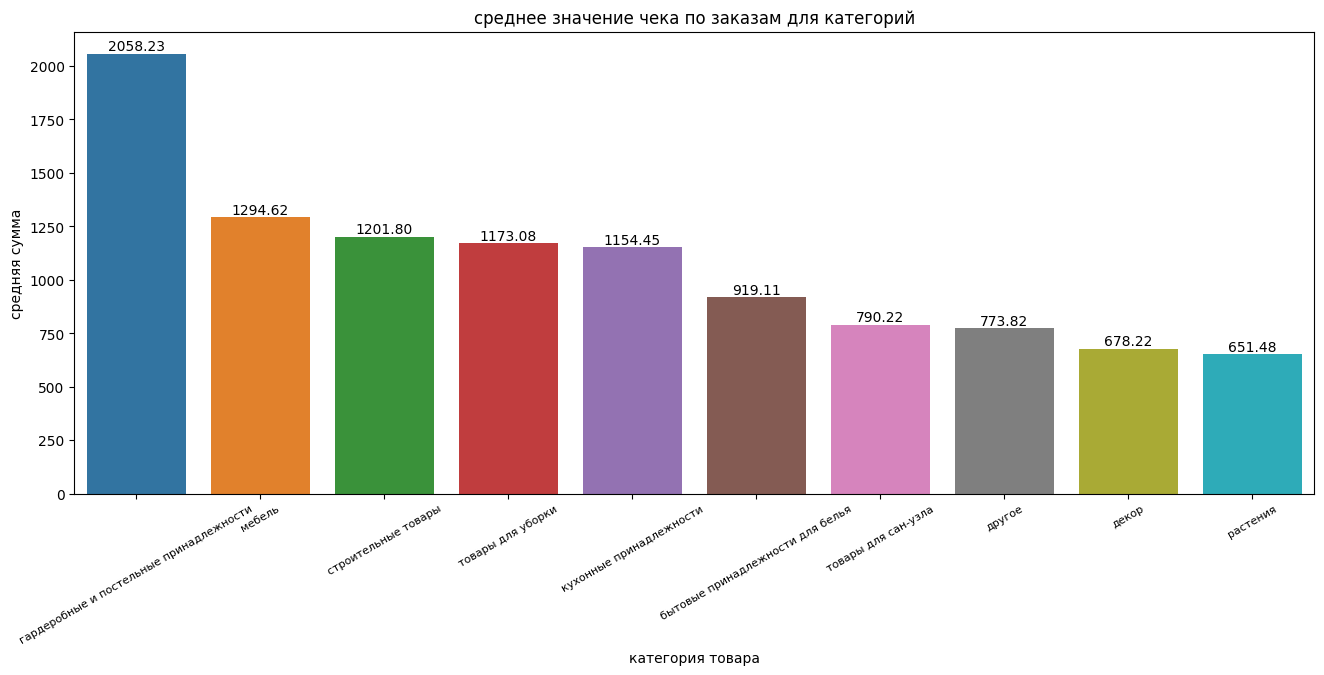

In [ ]:
# график - среднее значение чека по уникальным заказам для каждой категории

fig6 = plt.figure(figsize=(16,6))

ax6 = sns.barplot(y = 'avg_bill_sum',
            x = 'goods_category',
            data = df_avg_bill.sort_values(by='avg_bill_sum', ascending = False))
plt.title('среднее значение чека по заказам для категорий')
plt.xlabel('категория товара')
plt.ylabel('средняя сумма')
plt.xticks(fontsize=8, rotation=30);
for p in ax6.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax6.annotate('{:.2f}'.format(y), (x.mean(), y),ha='center', va='bottom', fontsize = 10)

In [ ]:
# распределение товаров на основной и дополнительный асортимент в каждой категории

# создаем пустую колонку в дф "general_category"
df['general_category'] = ''

In [ ]:
# с помощью функции создаем колонку с коротким наименованием товаров

def shorten_name(x):
  y = x.split()[0]
  return y

df['short_name'] = df.goods.apply(shorten_name)

In [ ]:
# количество покупок товаров в категории "растения"

df_plants_1 = df[df.goods_category == 'растения'].groupby('short_name').\
  agg(purchase_count = ('quantity', 'sum')).reset_index().\
  sort_values(by='purchase_count', ascending=False)

df_plants_1.head(2)

,short_name,purchase_count
102,Пеларгония,935
115,Рассада,671


In [ ]:
# средняя цена товаров в категории "растениия"

df_plants_2 = df[df.goods_category == 'растения'].groupby('short_name').\
  agg(mean_price = ('price', 'mean')).reset_index().\
  sort_values(by='mean_price', ascending=True)

df_plants_2.head(2)

,short_name,mean_price
37,Горох,9.0
161,Эшшольция,10.0


In [ ]:
# объединим дф с кол-вом покупок товаров и средней ценой этих товаров

df_plants = df_plants_1.merge(df_plants_2, 'inner').round(2)
del df_plants_1
del df_plants_2

In [ ]:
# медианное значение средней цены по товару
df_plants.mean_price.median()

142.0

In [ ]:
# сортировка по кол-ву продаж товара с средней ценой меньше медианного значения
# видим 4 позиции аномально выделяющиеся кол-вом покупок - добавим их в категорию дополнительные

df_plants[df_plants.mean_price < 142].sort_values(by='purchase_count', ascending=False).head(10)

,short_name,purchase_count,mean_price
1,Рассада,671,109.45
2,томата,275,38.00
3,Петуния,181,141.40
4,Однолетнее,168,82.94
8,Циперус,40,110.91
9,Базилик,38,21.00
12,Бегония,29,140.62
13,Примула,29,120.20
15,Мята,24,75.00
16,Фуксия,22,138.95


In [ ]:
# создаем списки товаров для добавления в категорию "дополнительных"
add_goods = [['Рассада', 'томата', 'Петуния', 'Однолетнее']]

In [ ]:
# проанализируем оставшиеся категории по аналогичному методу

for cat in df.goods_category.unique():
  if cat != 'растения':
    print(f'категория <<{cat}>>')
    df_1 = df[df.goods_category == cat].groupby('short_name').\
    agg(purchase_count = ('quantity', 'sum')).reset_index().\
    sort_values(by='purchase_count', ascending=False)

    df_2 = df[df.goods_category == cat].groupby('short_name').\
      agg(mean_price = ('price', 'mean')).reset_index().\
      sort_values(by='mean_price', ascending=True)

    df_merged = df_1.merge(df_2, 'inner').round(2)
    del df_1
    del df_2
    display(df_merged[df_merged.mean_price < df_merged.mean_price.median()].\
    sort_values(by='purchase_count', ascending=False).head(8))
    print()
    del df_merged

категория <<бытовые принадлежности для белья>>


,short_name,purchase_count,mean_price
4,Подкладка,15,127.0
6,Набор,10,86.0
7,Рукав,6,316.2
10,Бельевые,2,66.5
11,Прищепки,2,299.0
13,Кондиционер,2,262.0
15,Антинакипин,2,164.0
16,Мешок,1,104.0



категория <<товары для сан-узла>>


,short_name,purchase_count,mean_price
0,Таз,188,249.32
1,Крепеж,100,19.00
2,Карниз,37,330.15
3,Мыло,21,78.33
7,Сиденье,9,348.88
11,Полотенце,6,89.00
15,Зубная,4,164.00
18,Подголовник,3,273.50



категория <<гардеробные и постельные принадлежности>>


,short_name,purchase_count,mean_price
0,Вешалка,262,420.89
1,Крючок,151,40.33
2,Вешалка-плечики,90,57.62
3,Набор,88,293.88
4,Чехол,52,269.21
6,Плечики,19,21.75
7,Кофр,18,511.83
8,Вешалка-перекладина,12,128.00



категория <<кухонные принадлежности>>


,short_name,purchase_count,mean_price
0,Тарелка,312,132.30
1,Салфетка,132,153.33
2,Кружка,110,112.20
4,Универсальный,80,45.00
6,Нож,54,134.64
8,Салатник,51,143.29
9,Половник,40,83.00
11,Комплект,22,148.75



категория <<строительные товары>>


,short_name,purchase_count,mean_price
2,Шпингалет,100,44.00
3,Стяжка,100,20.20
5,Ковш,70,63.33
6,Ведро,50,64.00
7,Крючок,28,41.00
11,Шнур,10,50.20
13,Мешок,5,22.00
14,Холодная,5,46.67



категория <<декор>>


,short_name,purchase_count,mean_price
1,Искусственный,435,39.59
2,Цветок,325,28.59
4,Насадка,70,22.00
6,Искусственная,44,71.00
9,Львиный,1,9.00



категория <<товары для уборки>>


,short_name,purchase_count,mean_price
1,Ёрш,150,59.69
2,Щетка-сметка,124,59.22
3,Щетка-утюжок,100,44.00
9,Средство,8,132.14
10,Тряпка,5,149.00
14,Тряпкодержатель,2,119.00
15,Чистящий,1,187.00
16,Универсальное,1,82.00



категория <<мебель>>


,short_name,purchase_count,mean_price
2,Ящик,7,355.5
3,Рассада,5,38.0
6,Короб,4,599.0
8,Подставка,3,354.0
10,Вешалка,2,569.0
11,Ложка,2,48.0
13,Кольца,1,44.0



категория <<другое>>


,short_name,purchase_count,mean_price
0,Гвоздика,69,51.67
1,Калибрахоа,49,88.20
2,Бакопа,44,87.68
6,Уголок,24,28.00
7,Завертка,22,44.00
8,Крепеж,20,22.00
9,Дендробиум,19,67.00
11,Арбуз,18,38.00


In [ ]:
# проанализируем и добавим в список "доп" товаров
# отметим, что есть категории, в которых есть только основные товары

add_goods.append(['Набор', 'Подкладка'])
add_goods.append(['Таз', 'Крепеж'])
add_goods.append(['Вешалка', 'Крючок', 'Вешалка-плечики', 'Набор'])
add_goods.append(['Тарелка', 'Салфетка', 'Кружка', 'Универсальный'])
add_goods.append(['Шпингалет', 'Стяжка'])
add_goods.append(['Искусственный', 'Цветок'])
add_goods.append(['Ёрш', 'Щетка-сметка', 'Щетка-утюжок'])

In [ ]:
# формируем категорию дополнительные товары в датафрейме

i = 0
for cat in df.goods_category.unique()[:-2]:
  for word in add_goods[i]:
    df['general_category'][(df.goods_category == cat) & (df.short_name.str.contains(word))] = 'дополнительные'
  i += 1

In [ ]:
# заполняем оставшиеся товары категорией "основные"

df['general_category'][df.general_category == ''] = 'основные'

In [ ]:
# проверим, остались ли пропущенные значения по признаку "general_category"

df['general_category'][df.general_category == ''].shape[0]

0

In [ ]:
# сортировка по количеству товара в основном и дополнительном асортименте

df.groupby('general_category').agg(goods_count = ('goods', 'count')).reset_index()

,general_category,goods_count
0,дополнительные,1178
1,основные,3584


In [ ]:
# средняя стоимость товаров по категориям основные и дополнительные товары

df.groupby('general_category').agg(price_mean = ('price', 'mean')).reset_index().round(2)

,general_category,price_mean
0,дополнительные,120.17
1,основные,419.97


In [ ]:
# график - топ 5 по кол-ву продаж товаров в категории основные и дополнительные товары
df_temp_goods = df[df.general_category == 'дополнительные'].groupby('short_name').\
agg(count = ('quantity', 'sum')).reset_index().sort_values(by='count', ascending=False).head()

df_main_goods = df[df.general_category == 'основные'].groupby('short_name').\
agg(count = ('quantity', 'sum')).reset_index().sort_values(by='count', ascending=False).head()

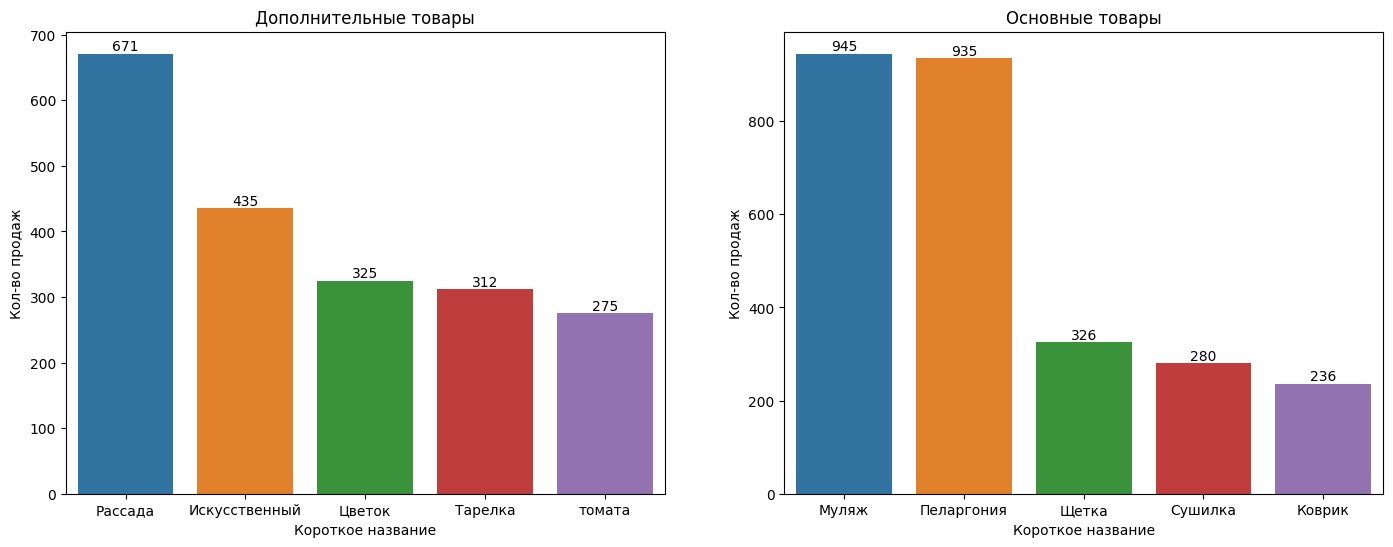

In [ ]:
fig7, ax7 = plt.subplots(1, 2, figsize=(17,6))
plt.subplot(1,2,1)
ax7 = sns.barplot(x = 'short_name',
                  y = 'count',
                  data = df_temp_goods)
plt.title('Дополнительные товары')
plt.xlabel('Короткое название')
plt.ylabel('Кол-во продаж')
for p in ax7.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax7.annotate('{:.0f}'.format(y), (x.mean(), y),ha='center', va='bottom', fontsize = 10)

plt.subplot(1,2,2)
ax7 = sns.barplot(x = 'short_name',
                  y = 'count',
                  data = df_main_goods)
plt.title('Основные товары')
plt.xlabel('Короткое название')
plt.ylabel('Кол-во продаж')
for p in ax7.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax7.annotate('{:.0f}'.format(y), (x.mean(), y),ha='center', va='bottom', fontsize = 10)

### Шаг 5. Статистические гипотезы
Проверка равенства средних чеков по каждой категории товара

In [ ]:
# необходимые для анализа дф хранятся в словаре, созданном выше "dict_df_avg_bill"

In [ ]:
# точечные оценки по суммам чеков для каждой категории
for key, value in dict_df_avg_bill.items():
  print(f'Точечные оценки для признака <<{key}>>')
  print(f"среднее значение: {value['avg_bill'].mean().round(2)}")
  print(f"медиана: {value['avg_bill'].median().round(2)}")
  print(f"мода: {value['avg_bill'].mode().round(2)[0]}")
  print()

Точечные оценки для признака <<растения>>
среднее значение: 651.48
медиана: 376.0
мода: 134.0

Точечные оценки для признака <<бытовые принадлежности для белья>>
среднее значение: 919.11
медиана: 652.0
мода: 599.0

Точечные оценки для признака <<товары для сан-узла>>
среднее значение: 790.22
медиана: 449.0
мода: 974.0

Точечные оценки для признака <<гардеробные и постельные принадлежности>>
среднее значение: 2058.23
медиана: 941.0
мода: 164.0

Точечные оценки для признака <<кухонные принадлежности>>
среднее значение: 1154.45
медиана: 670.5
мода: 149.0

Точечные оценки для признака <<строительные товары>>
среднее значение: 1201.8
медиана: 1049.0
мода: 1087.0

Точечные оценки для признака <<декор>>
среднее значение: 678.22
медиана: 320.0
мода: 59.0

Точечные оценки для признака <<товары для уборки>>
среднее значение: 1173.08
медиана: 560.0
мода: 82.0

Точечные оценки для признака <<мебель>>
среднее значение: 1294.62
медиана: 1162.0
мода: 1199.0

Точечные оценки для признака <<другое>>
сре

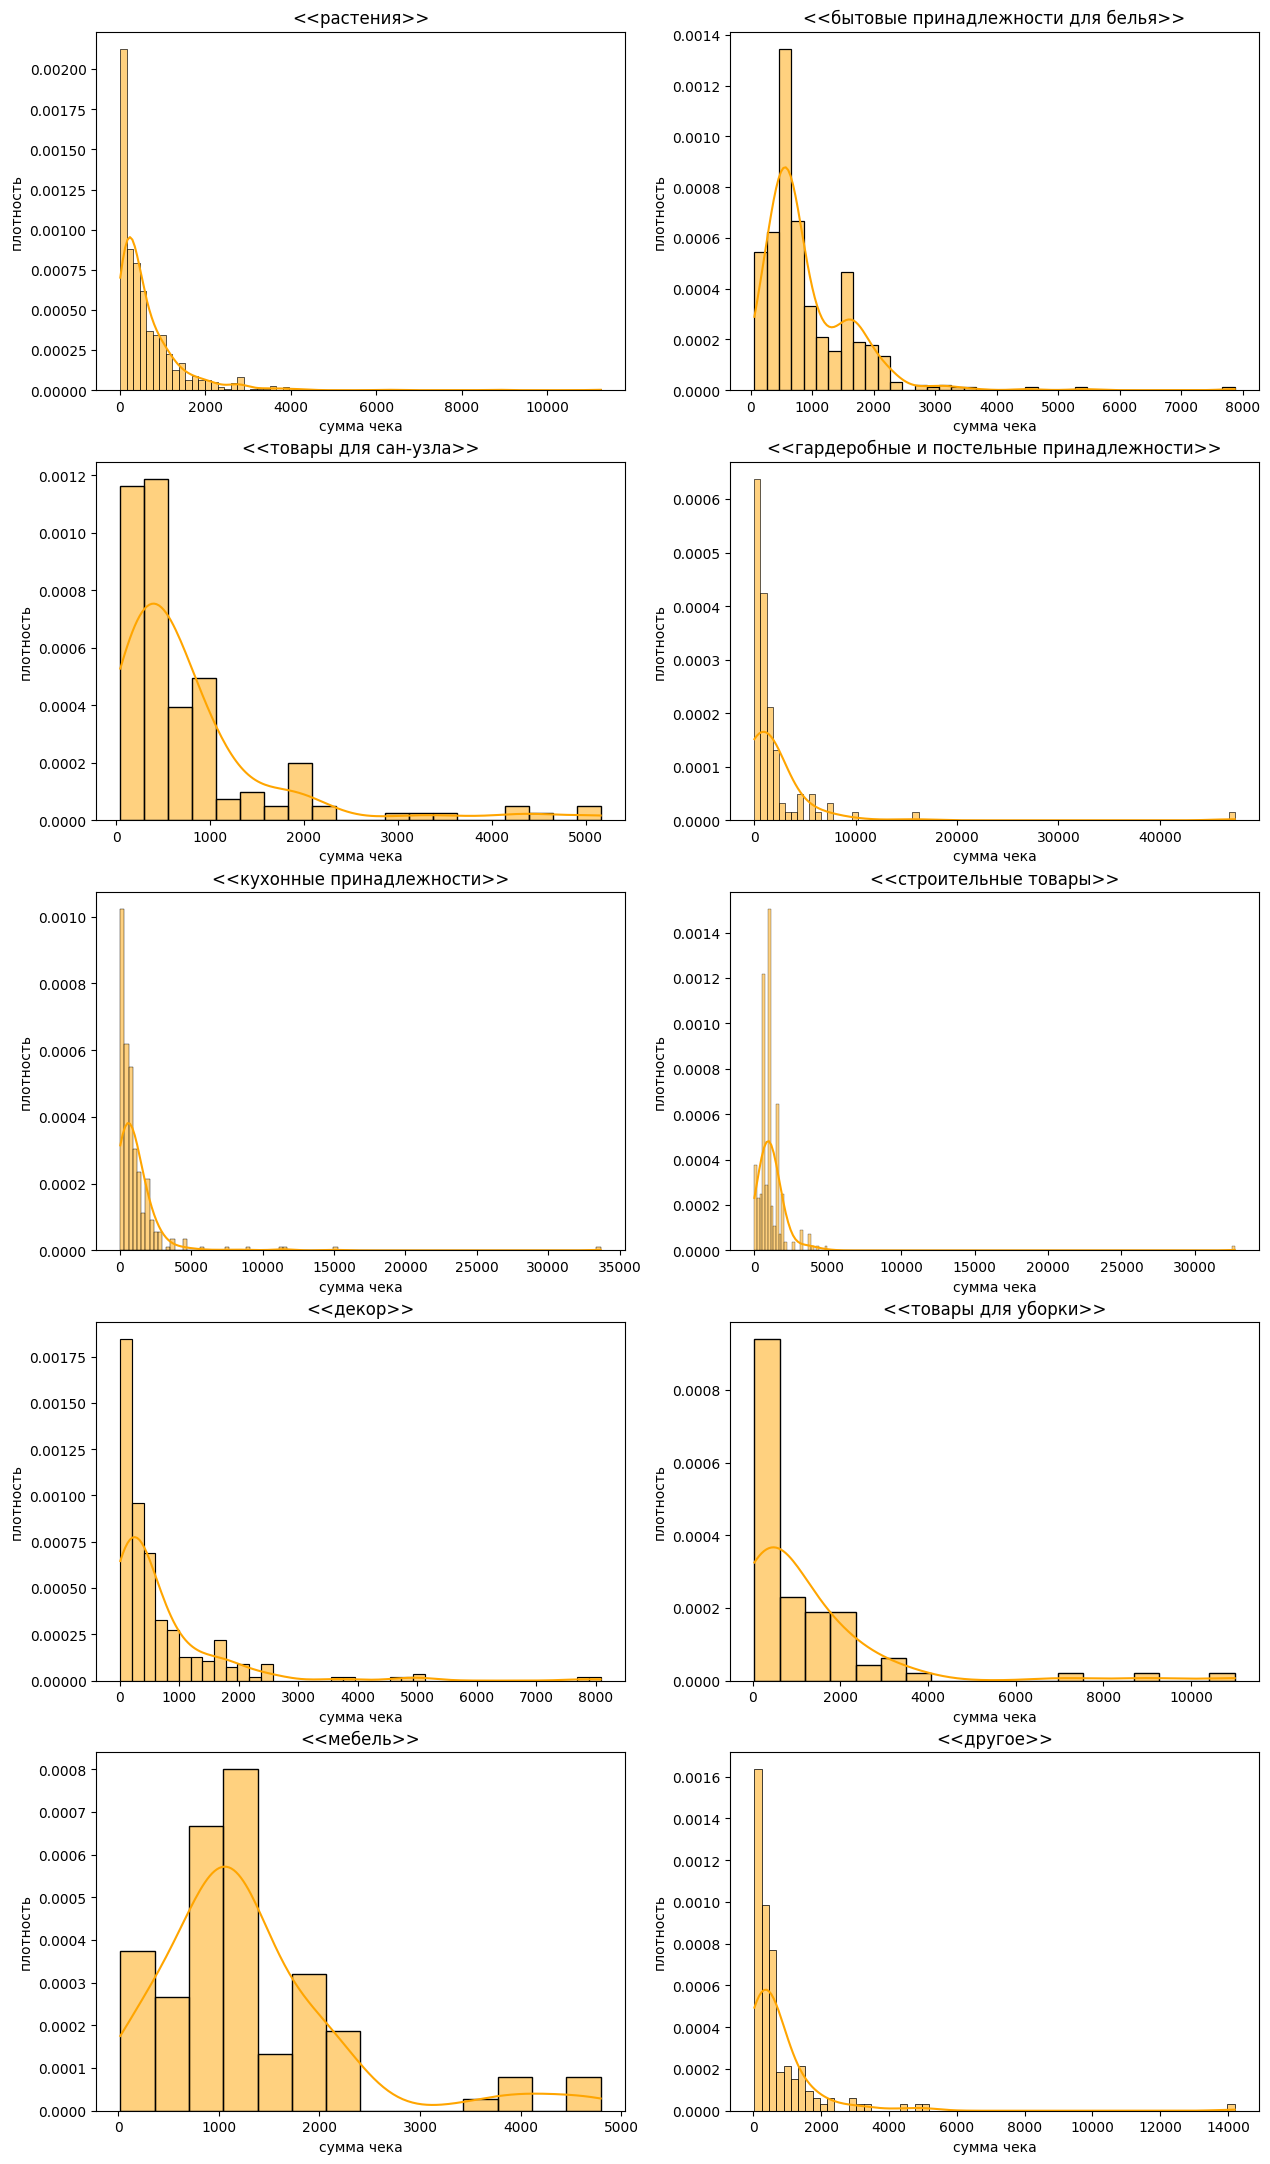

In [ ]:
# график плотности распределения по сумме чеков для каждой категории товаров

fig8, ax8 = plt.subplots(5,2, figsize=(15,27))

i = 1
for key, value in dict_df_avg_bill.items():
  plt.subplot(5, 2, i)
  ax8 = sns.histplot(x = 'avg_bill',
                     data = value,
                     kde = True,
                     stat = 'density',
                     color = 'orange')
  plt.title(f'<<{key}>>')
  plt.xlabel('сумма чека')
  plt.ylabel('плотность')
  i += 1

Проверка гипотезы о виде закона распределения

$$
\text{гипотеза } H_0: \text{случайная величина подчиняется нормальному распределению}
$$
$$
\text{гипотеза } H_1: \text{случайная величина имеет распределение отличное от нормального закона}
$$

Задаем уровень значимости -- $\alpha = 0.05$

Если $p_{value} \leqslant \alpha$, то гипотеза $H_0$ отвергается на уровне значимости $α$. И принимается гипотеза $H_1$.

In [ ]:
# проверка на нормальность с помощью критерия Шапиро

for key, value in dict_df_avg_bill.items():
  if shapiro(value.avg_bill)[1] <= 0.05:
    print(f'Для средних чеков категории <<{key}>> p_value = {round(shapiro(value.avg_bill)[1], 3)}')
    print(f'Гипотеза H0 отвергается')
    print(f'Распределение отличное от нормального')
  else:
    print(f'Для признака <<{key}>> p_value = {round(shapiro(value.avg_bill)[1], 3)}')
    print(f'Гипотеза H0 принимается')
    print(f'Распределение нормальное')
  print()

Для средних чеков категории <<растения>> p_value = 0.0
Гипотеза H0 отвергается
Распределение отличное от нормального

Для средних чеков категории <<бытовые принадлежности для белья>> p_value = 0.0
Гипотеза H0 отвергается
Распределение отличное от нормального

Для средних чеков категории <<товары для сан-узла>> p_value = 0.0
Гипотеза H0 отвергается
Распределение отличное от нормального

Для средних чеков категории <<гардеробные и постельные принадлежности>> p_value = 0.0
Гипотеза H0 отвергается
Распределение отличное от нормального

Для средних чеков категории <<кухонные принадлежности>> p_value = 0.0
Гипотеза H0 отвергается
Распределение отличное от нормального

Для средних чеков категории <<строительные товары>> p_value = 0.0
Гипотеза H0 отвергается
Распределение отличное от нормального

Для средних чеков категории <<декор>> p_value = 0.0
Гипотеза H0 отвергается
Распределение отличное от нормального

Для средних чеков категории <<товары для уборки>> p_value = 0.0
Гипотеза H0 отвергает

In [ ]:
# проверка на нормальность с помощью критерия Колмогорова Смирнова

for key, value in dict_df_avg_bill.items():
  if kstest(value.avg_bill,
        'norm',
        args=(value.avg_bill.mean(), value.avg_bill.std()))[1] <= 0.05:
    print(f"Для средних чеков категории <<{key}>> p_value = {round(kstest(value.avg_bill, 'norm', args=(value.avg_bill.mean(), value.avg_bill.std()))[1], 3)}")
    print(f'Гипотеза H0 отвергается')
    print(f'Распределение отличное от нормального')
  else:
    print(f"Для признака <<{key}>> p_value = {round(kstest(value.avg_bill, 'norm', args=(value.avg_bill.mean(), value.avg_bill.std()))[1], 3)}")
    print(f'Гипотеза H0 принимается')
    print(f'Распределение нормальное')
  print()

Для средних чеков категории <<растения>> p_value = 0.0
Гипотеза H0 отвергается
Распределение отличное от нормального

Для средних чеков категории <<бытовые принадлежности для белья>> p_value = 0.0
Гипотеза H0 отвергается
Распределение отличное от нормального

Для средних чеков категории <<товары для сан-узла>> p_value = 0.0
Гипотеза H0 отвергается
Распределение отличное от нормального

Для средних чеков категории <<гардеробные и постельные принадлежности>> p_value = 0.0
Гипотеза H0 отвергается
Распределение отличное от нормального

Для средних чеков категории <<кухонные принадлежности>> p_value = 0.0
Гипотеза H0 отвергается
Распределение отличное от нормального

Для средних чеков категории <<строительные товары>> p_value = 0.0
Гипотеза H0 отвергается
Распределение отличное от нормального

Для средних чеков категории <<декор>> p_value = 0.0
Гипотеза H0 отвергается
Распределение отличное от нормального

Для средних чеков категории <<товары для уборки>> p_value = 0.0
Гипотеза H0 отвергает

$p_{value} \leqslant \alpha$, отвергаем гипотезу $H_0$ на уровне значимости $0.05$
- то есть мы имеем распределения отличные от нормального по средним чекам в каждой категории товаров

формулировка гипотезы о равенстве средних чеков в каждой категории:

$$
\text{гипотеза } H_0: \text{отсутствует статистически значимая разница между суммами чеков в исследуемых категориях товаров}
$$
$$
\text{гипотеза } H_1: \text{существует статистически значимая разница между суммами чеков в исследуемых категориях товаров}
$$

Задаем уровень значимости -- $\alpha = 0.05$

Если $p_{value} \leqslant \alpha$, то гипотеза $H_0$ отвергается на уровне значимости $α$. И принимается гипотеза $H_1$.

In [ ]:
# так как распределения отличны от нормального - используем критерий Манна Уитни
# осуществляем проверку на равенство : alternative='two-sided'

# проверяем первую категорию со всеми остальными

excl_list = []
for key, value in dict_df_avg_bill.items():
  for key1, value1 in dict_df_avg_bill.items():
    if key != key1 and key1 not in excl_list:
      print(f'Проверка на равенство для категорий <<{key}>> и <<{key1}>>')
      if mannwhitneyu(value.avg_bill,
                  value1.avg_bill,
                  alternative='two-sided')[1] <= 0.05:
        print(f"P_value = {round(mannwhitneyu(value.avg_bill, value1.avg_bill, alternative='two-sided')[1], 3)}")
        print(f'Отвергаем гипотезу H0 и принимаем альтернативную H1')
        print(f'Существует статистически значимая разница между средними чеками по категориям товаров <<{key}>> и <<{key1}>>')
      else:
        print(f"P_value = {round(mannwhitneyu(value.avg_bill, value1.avg_bill, alternative='two-sided')[1], 3)}")
        print(f'Принимаем гипотезу H0')
        print(f'Отсутствует статистически значимая разница между средними чеками по категориям товаров <<{key}>> и <<{key1}>>')
      excl_list.append(key)
      print()

Проверка на равенство для категорий <<растения>> и <<бытовые принадлежности для белья>>
P_value = 0.0
Отвергаем гипотезу H0 и принимаем альтернативную H1
Существует статистически значимая разница между средними чеками по категориям товаров <<растения>> и <<бытовые принадлежности для белья>>

Проверка на равенство для категорий <<растения>> и <<товары для сан-узла>>
P_value = 0.002
Отвергаем гипотезу H0 и принимаем альтернативную H1
Существует статистически значимая разница между средними чеками по категориям товаров <<растения>> и <<товары для сан-узла>>

Проверка на равенство для категорий <<растения>> и <<гардеробные и постельные принадлежности>>
P_value = 0.0
Отвергаем гипотезу H0 и принимаем альтернативную H1
Существует статистически значимая разница между средними чеками по категориям товаров <<растения>> и <<гардеробные и постельные принадлежности>>

Проверка на равенство для категорий <<растения>> и <<кухонные принадлежности>>
P_value = 0.0
Отвергаем гипотезу H0 и принимаем альт